In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [64]:
df['job_posted_month'] = df['job_posted_date'].dt.month_name()


<Axes: xlabel='job_posted_month'>

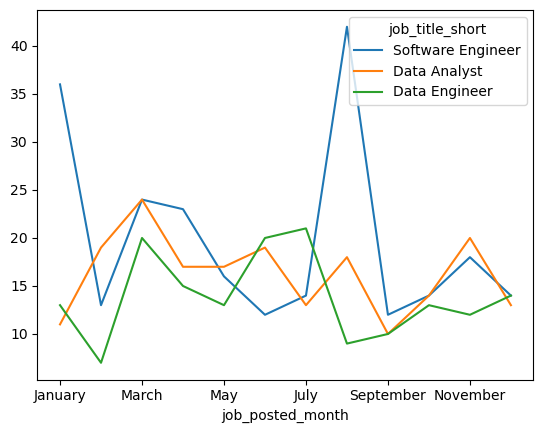

In [68]:
df_Serbia = df[df['job_country'] == 'Serbia']
df_Serbia
pivot_serbia = df_Serbia.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")
pivot_serbia.reset_index(inplace=True)
pivot_serbia['month_no'] = pd.to_datetime(pivot_serbia['job_posted_month'], format='%B').dt.month
pivot_serbia.sort_values(by="month_no", inplace=True)
pivot_serbia.set_index("job_posted_month", inplace=True)
pivot_serbia.drop(columns="month_no", inplace=True)

top_3 = df_Serbia['job_title_short'].value_counts().head(3)
pivot_top3 = pivot_serbia.loc[:,top_3.index]

pivot_top3.plot(kind="line")



